# Detecting the biological memory in the trees

In this tutorial, we detect the biological memory in the trees (using the TRW data) in PAGES2k.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from statsmodels.tsa import stattools as st

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

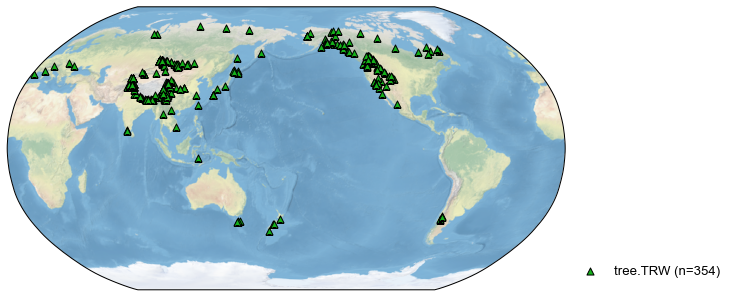

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
pdb = cfr.ProxyDatabase().from_df(df)
pdb_TRW = pdb.filter(by='ptype', keys=['TRW'])
fig, ax = pdb_TRW.plot()

## Calculate the PACF for each site

In [3]:
pacf = {}
for pid, pobj in pdb_TRW.records.items():
    pacf[pid] = st.pacf(pobj.value, nlags=10)

In [4]:
pacf_lag = {}
pacf_lag[1] = []
pacf_lag[2] = []
pacf_lag[3] = []
lats = []
lons = []
for pid, pobj in pdb_TRW.records.items():
    pacf_tmp = st.pacf(pobj.value, nlags=10)
    pacf_lag[1].append(pacf_tmp[1])
    pacf_lag[2].append(pacf_tmp[2])
    pacf_lag[3].append(pacf_tmp[3])
    lats.append(pobj.lat)
    lons.append(pobj.lon)

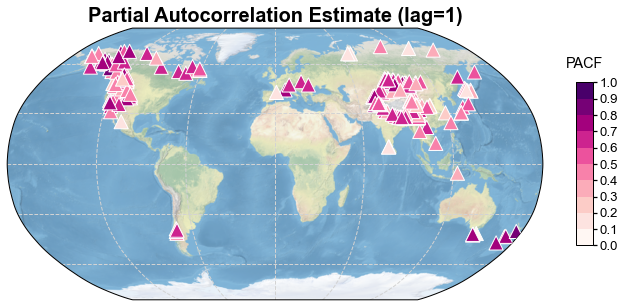

Figure saved at: "figs/pacf_lag1.pdf"


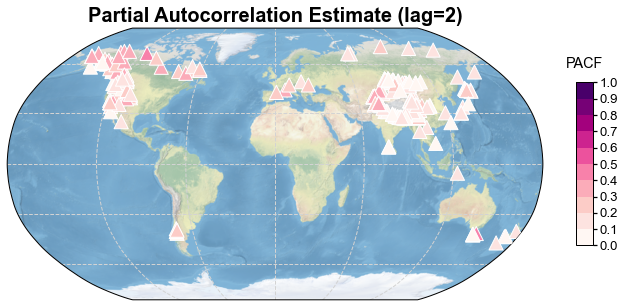

Figure saved at: "figs/pacf_lag2.pdf"


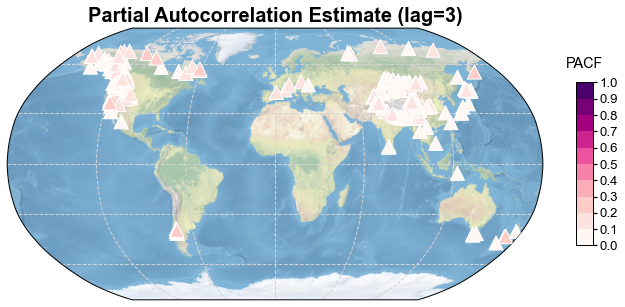

Figure saved at: "figs/pacf_lag3.pdf"


In [5]:
levels = np.arange(0, 1.1, 0.1)
cbar_ticks = np.arange(0, 1.1, 0.1)
cbar_title = 'PACF'
cmap = 'RdPu'

for i in range(1, 4):
    fig, ax = cfr.visual.plot_scatter_map(
        pacf_lag[i], lats, lons, marker='^', title=f'Partial Autocorrelation Estimate (lag={i})',
        cbar_ticks=cbar_ticks,
        cbar_title=cbar_title,
        levels=levels,
        cmap=cmap,
    )
    cfr.showfig(fig)
    cfr.savefig(fig, f'./figs/pacf_lag{i}.pdf')